# Lasso Performance Model

In [107]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_transformer
from sklearn.svm import SVR


In [108]:
! pwd

/Users/alexander.fioto/dsir-824/submissions/projects/project-2-master


In [109]:
# Reading in feature enhanced data
training = pd.read_csv('./datasets/training_enhanced.csv')
test = pd.read_csv('./datasets/test_enhanced.csv')

In [110]:
features = [#'all_sf',
            'overall_qual',  
            'exter_qual',
            'all_flr_sf', 
            #'gr_liv_area',
            'neighborhood',
            'kitchen_qual',
            #'garage_cars',
            'total_bsmt_sf', 
            #'1st_flr_sf',
            'garage_area',
            #'total_bath', 
            'year_built',
            'year_remod/add',
            'full_bath',
            #'totrms_abvgrd',
            'mas_vnr_area',
            'fireplaces', 
            'heating_qc',
            'bsmtfin_sf_1',
            #'open_porch_sf',
            'lot_area',
            'lot_frontage',
            #'central_air'
]

In [111]:
X = training[features]
y = training['saleprice']
test = test[features]

In [112]:
lasso_pipe = make_pipeline(StandardScaler(), 
                           PolynomialFeatures(),
                           Lasso())


In [113]:
lasso_params = {
    'lasso__fit_intercept': [True, False],
    'lasso__alpha': range(550, 650)
          }

In [114]:
lasso_gs = GridSearchCV(lasso_pipe, lasso_params, n_jobs=-1)

In [115]:
lasso_gs.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('lasso', Lasso())]),
             n_jobs=-1,
             param_grid={'lasso__alpha': range(550, 650),
                         'lasso__fit_intercept': [True, False]})

Lasso Training Score 0.928964599834688
Lasso RMSE Training 20466.394523774765
{'lasso__alpha': 550, 'lasso__fit_intercept': True}


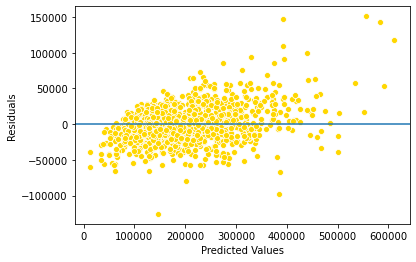

In [116]:
# Scoring the model


print('Lasso Training Score', lasso_gs.score(X, y))
print('Lasso RMSE Training', mean_squared_error(y, lasso_gs.predict(X), squared=False))

# Calculating best parameters
print(lasso_gs.best_params_)

preds = lasso_gs.predict(X)
resids = np.array(y) - preds
sns.scatterplot(x=y, y=resids, color='gold')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline();

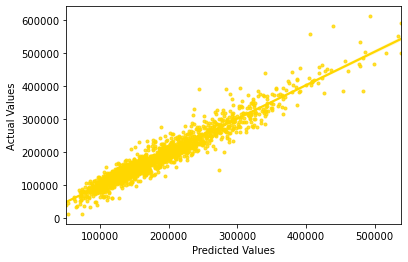

In [117]:
sns.regplot(x=preds, y=y, marker='.', color='gold')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

In [105]:
# Creating predictions CSV
test_preds = lasso_gs.predict(test)
test1 = pd.read_csv('./datasets/test.csv')
submission= pd.DataFrame(test_preds, index=test1['Id'])
submission.columns = ['saleprice']

In [106]:
#Exporting predictions CSV
submission.to_csv('./datasets/5_lasso_submission.csv')